In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the dataset
path= '/content/drive/MyDrive/Data Science/Zomato project/Zomato data .csv'
df= pd.read_csv(path)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [19]:
# Removing the denominator from rate
df['rate']= df['rate'].str.replace('/5','')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
# Since there is no null value, we can go forward with problem statements
## 1. 1) What type of restaurant do the majority of customers order from?
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

<ipython-input-20-347730ec8c1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette='mako')


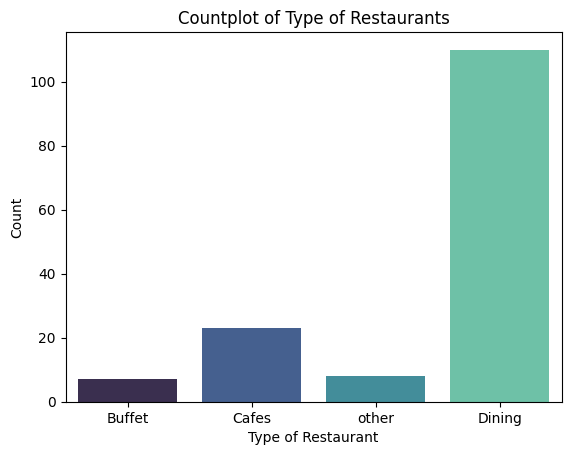

In [20]:
## Countplot of type of restaurants
sns.countplot(x=df['listed_in(type)'], palette='mako')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Countplot of Type of Restaurants')
plt.show()

In [ ]:
### Conclusion 1. The majority of the customers orders from Dining type of restaurants.

In [21]:
## 2. How many votes has each type of restaurant received from customers?
df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

<ipython-input-26-eb20c23f7ea1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False).index, y=df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False), palette='mako')


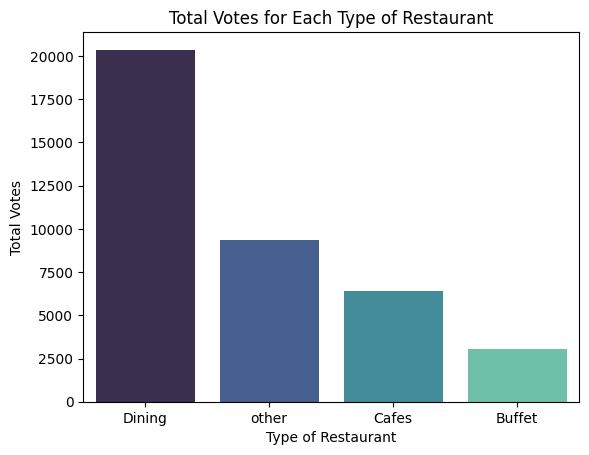

In [26]:
# Barplot to visualize the data
sns.barplot(x=df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False).index, y=df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False), palette='mako')
plt.xlabel('Type of Restaurant')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Type of Restaurant')
plt.show()

In [ ]:
### Conclusion 2: The majority of the votes were given to Dining, followed by Other types and cafes.

In [38]:
## 3. What are the ratings that the majority of restaurants have received?
df['rate'].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

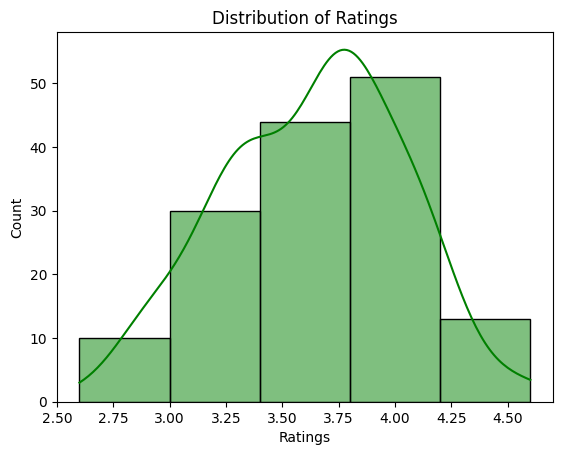

In [37]:

### Bundle rate by 5 and create a histplot
sns.histplot(x=df['rate'], bins=5, kde=True, color='green')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
### Conclusion 3. The majority of the votes the restaurant received is 3.8

In [8]:
### 4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?
## We need to calculate the average from approx_cost(for two people) where online_order is Yes
df[df['online_order']=='Yes']['approx_cost(for two people)'].mean()

510.3448275862069

<ipython-input-20-89ba3e8be984>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['online_order'], y=df['rate'], palette='mako')


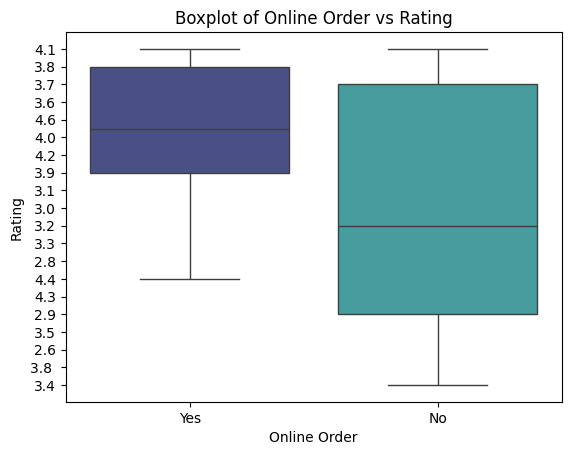

In [20]:
### 5. Which mode (online or offline) has received the maximum rating?
# Using boxplot to detrime the answer, online_order yes and no
sns.boxplot(x=df['online_order'], y=df['rate'], palette='mako')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Boxplot of Online Order vs Rating')
plt.show()


In [ ]:
### Conclusion 5: Online orders are having higher rating than offline orders

In [21]:
### 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?
# We need to see where online_orders is No and corresponding to Type of restaurant
df[df['online_order']=='No']['listed_in(type)'].value_counts()

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64

<ipython-input-23-49469c82391a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df['online_order']=='No']['listed_in(type)'], palette='mako')


Text(0.5, 1.0, 'Countplot of Type of Restaurant for Offline Orders')

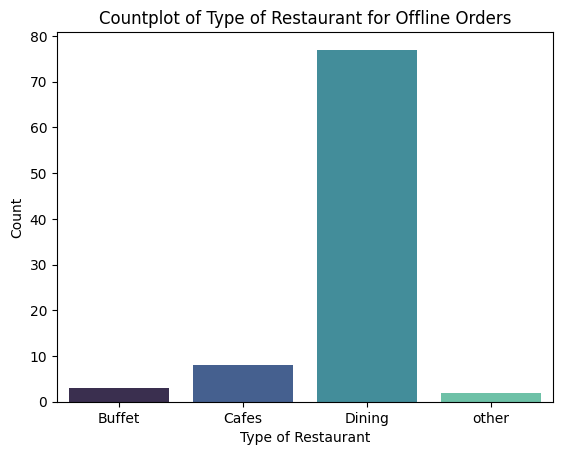

In [23]:
# Plot the data in countplot
sns.countplot(x=df[df['online_order']=='No']['listed_in(type)'], palette='mako')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Countplot of Type of Restaurant for Offline Orders')

In [ ]:
### Conclusion 6: Dining type of restaurants receives more offline orders than the rest, Zomato can provide them with good offers.